In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#read dataset
data=pd.read_csv('Salary_Data.csv')

In [20]:
#Parameters
learning_rate=0.01
training_epochs=100
display_step=50

In [21]:
#Training data
X_train=data.iloc[:,0]
Y_train=data.iloc[:,1]
n_samples=len(X_train)

In [22]:
#tf Graph Input
X=tf.placeholder("float")
Y=tf.placeholder("float")

In [23]:
#Set model weights
W=tf.Variable(np.random.randn(),name="weight")
b=tf.Variable(np.random.randn(),name="bias")

In [24]:
#Construct a linear model
pred=tf.add(tf.multiply(X,W),b)

In [25]:
#Mean Square error
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

In [26]:
#Gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [27]:
#initializing the variables
from tensorflow.python.framework import ops
init=tf.global_variables_initializer()

Epoch: 0050 cost= 65569184.000000000 W= 12495.644 b= 4351.062
Epoch: 0050 cost= 65480132.000000000 W= 12506.741 b= 4359.5986
Epoch: 0050 cost= 65428372.000000000 W= 12514.047 b= 4364.469
Epoch: 0050 cost= 65373052.000000000 W= 12523.469 b= 4369.18
Epoch: 0050 cost= 65341920.000000000 W= 12529.313 b= 4371.837
Epoch: 0050 cost= 65275020.000000000 W= 12544.718 b= 4377.1484
Epoch: 0050 cost= 65209348.000000000 W= 12562.856 b= 4383.195
Epoch: 0050 cost= 65178312.000000000 W= 12573.374 b= 4386.482
Epoch: 0050 cost= 65129104.000000000 W= 12594.52 b= 4393.09
Epoch: 0050 cost= 65117152.000000000 W= 12602.161 b= 4395.1553
Epoch: 0050 cost= 65103244.000000000 W= 12614.738 b= 4398.38
Epoch: 0050 cost= 65102236.000000000 W= 12615.987 b= 4398.692
Epoch: 0050 cost= 65100212.000000000 W= 12618.779 b= 4399.39
Epoch: 0050 cost= 65099400.000000000 W= 12620.07 b= 4399.705
Epoch: 0050 cost= 65099460.000000000 W= 12619.952 b= 4399.6787
Epoch: 0050 cost= 65098440.000000000 W= 12622.7295 b= 4400.2456
Epoch: 0

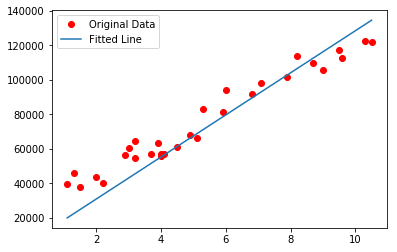

In [33]:
#Launch Graph
with tf.Session() as sess:
    sess.run(init)
    
    #fitting all training data
    for epoch in range(training_epochs):
        for (x,y) in zip(X_train,Y_train):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            
            if (epoch+1)%display_step==0:
                c=sess.run(cost,feed_dict={X:X_train,Y:Y_train})
                print("Epoch:",'%04d' % (epoch+1), "cost=","{:.9f}".format(c),"W=", sess.run(W),"b=",sess.run(b))
                
    print("optimization finished")
    training_cost=sess.run(cost,feed_dict={X:X_train,Y:Y_train})
    print("Training cost=",training_cost,"W=", sess.run(W),"b=",sess.run(b))
    
    #Graphic dispaly
    plt.plot(X_train,Y_train,'ro',label='Original Data')
    plt.plot(X_train,sess.run(W)*X_train+sess.run(b),label='Fitted Line')
    plt.legend()
    plt.show()